### Data Wrangling, Analysis, and Visualization of USDA Fire Emissions Data Set (2003-2015)

### First Step - Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt, time
from numpy import median

%matplotlib inline

In [2]:
# Load Emissions CSV File"
emdata = pd.read_csv('emissions_year2003to2015.csv')

In [3]:
# Use pandas to view the first 5 rows of the file
emdata.head(5)

,id,year,doy,longitude,latitude,grid10k,covertype,fuelcode,area_burned,prefire_fuel,...,ECO,ECH4,EPM2.5,cwd_frac,duff_frac,fuel_moisture_class,burn_source,burnday_source,BSEV,BSEV_flag
0,0,2008,359,-81.0384,25.1958,4536,3,1600,0.0,6220.097576,...,153.981344,4.499455,23.797117,0.023231,0.082115,3,1,81,1,0
1,1,2008,359,-81.0404,25.1984,4536,3,1600,62500.0,6220.097576,...,157.185824,4.593092,24.292355,0.022757,0.080441,3,1,81,2,0
2,2,2008,359,-81.0380,25.1981,4536,3,1600,0.0,6220.097576,...,153.981344,4.499455,23.797117,0.023231,0.082115,3,1,81,1,0
3,3,2008,359,-81.0331,25.1973,4536,95,0,62500.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3,1,81,2,0
4,4,2008,359,-81.0594,25.2035,4536,3,1600,0.0,6220.097576,...,153.981344,4.499455,23.797117,0.023231,0.082115,3,1,81,1,0


In [4]:
# What are the dtypes of the columns
emdata.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7254534 entries, 0 to 7254533
Data columns (total 22 columns):
id                     int64
year                   int64
doy                    int64
longitude              float64
latitude               float64
grid10k                int64
covertype              int64
fuelcode               int64
area_burned            float64
prefire_fuel           float64
consumed_fuel          float64
ECO2                   float64
ECO                    float64
ECH4                   float64
EPM2.5                 float64
cwd_frac               float64
duff_frac              float64
fuel_moisture_class    int64
burn_source            int64
burnday_source         int64
BSEV                   int64
BSEV_flag              int64
dtypes: float64(11), int64(11)
memory usage: 1.2 GB


In [5]:
# How many rows and columns is the dataset?
emdata.shape

(7254534, 22)

In [6]:
# Determine the shape of the data
print("{} instances with {} features\n".format(*emdata.shape))

7254534 instances with 22 features



In [7]:
# Checking to see that all years were combined to file
print(emdata['year'].unique())

[2008 2009 2013 2007 2006 2012 2004 2010 2011 2005 2015 2014 2003]


In [8]:
# Checking for null values
emdata.isnull().sum()

id                     0
year                   0
doy                    0
longitude              0
latitude               0
grid10k                0
covertype              0
fuelcode               0
area_burned            0
prefire_fuel           0
consumed_fuel          0
ECO2                   0
ECO                    0
ECH4                   0
EPM2.5                 0
cwd_frac               0
duff_frac              0
fuel_moisture_class    0
burn_source            0
burnday_source         0
BSEV                   0
BSEV_flag              0
dtype: int64

In [9]:
# Removing select columns that are not necessary per earlier team discussion
emdata = emdata.drop(['grid10k', 'BSEV_flag', 'burnday_source'], 1)

In [10]:
# Verify the three columns were dropped
emdata.shape

(7254534, 19)

In [11]:
# Removing the rows with Zero values across Prefire Fuel, Consumed Fuel Mass and ECO2
do = emdata[(emdata.prefire_fuel == 0)]
do2 = do['prefire_fuel'].value_counts()
eo = emdata[(emdata.consumed_fuel == 0)]
eo2 = do['consumed_fuel'].value_counts()
fo = emdata[(emdata.ECO2 == 0)]
fo2 = fo['ECO2'].value_counts()

print(do2)
print(eo2)
print(fo2)

0.0    1293962
Name: prefire_fuel, dtype: int64
0.0    1293962
Name: consumed_fuel, dtype: int64
0.0    1293962
Name: ECO2, dtype: int64


In [12]:
indexNames = emdata[(emdata.prefire_fuel == 0) & (emdata.consumed_fuel == 0) & (emdata.ECO2 == 0)].index
emdata.drop(indexNames , inplace=True)

In [13]:
# Use pandas to get the summary statistics on the data
emdata.describe()

,id,year,doy,longitude,latitude,covertype,fuelcode,area_burned,prefire_fuel,consumed_fuel,ECO2,ECO,ECH4,EPM2.5,cwd_frac,duff_frac,fuel_moisture_class,burn_source,BSEV
count,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06
mean,1.128901e+07,2.009305e+03,1.730708e+02,-1.050490e+02,3.803980e+01,2.189173e+00,6.283838e+02,4.992622e+04,2.947503e+03,1.842402e+03,2.965052e+03,1.962275e+02,9.460753e+00,3.243165e+01,5.998773e-02,7.683271e-02,2.216377e+00,1.449038e+00,2.101838e+00
std,3.113785e+07,3.499761e+00,7.387169e+01,1.257917e+01,5.574091e+00,8.418228e-01,6.976638e+02,2.505517e+04,2.960848e+03,1.767418e+03,2.802989e+03,2.214744e+02,1.252737e+01,3.798760e+01,1.023220e-01,1.071232e-01,7.528200e-01,9.094067e-01,7.947994e-01
min,0.000000e+00,2.003000e+03,0.000000e+00,-1.246583e+02,2.468010e+01,1.000000e+00,1.000000e+00,0.000000e+00,3.810924e+00,3.544159e+00,5.943555e+00,2.480910e-01,9.498000e-03,3.615000e-02,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.474968e+05,2.006000e+03,1.050000e+02,-1.158255e+02,3.353190e+01,1.000000e+00,1.000000e+00,6.250000e+04,2.560044e+02,2.324552e+02,3.898273e+02,1.627186e+01,6.229800e-01,2.371043e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00
50%,3.126210e+05,2.009000e+03,1.880000e+02,-1.072852e+02,3.753470e+01,2.000000e+00,2.000000e+00,6.250000e+04,1.470120e+03,1.251245e+03,1.969832e+03,9.266699e+01,3.547822e+00,1.350290e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00
75%,5.828092e+05,2.012000e+03,2.270000e+02,-9.629230e+01,4.274970e+01,3.000000e+00,1.220000e+03,6.250000e+04,6.424431e+03,3.569616e+03,5.728583e+03,2.958688e+02,1.087070e+01,4.572518e+01,9.194700e-02,1.543580e-01,3.000000e+00,1.000000e+00,2.000000e+00
max,1.494107e+08,2.015000e+03,3.660000e+02,-6.700630e+01,4.900280e+01,3.000000e+00,2.950000e+03,6.250000e+04,1.333751e+04,1.047759e+04,1.628218e+04,1.393520e+03,7.837240e+01,2.388891e+02,4.970340e-01,8.003240e-01,4.000000e+00,4.000000e+00,4.000000e+00


In [14]:
# Remove zero value features noted during previous data reviews 
indexNames = emdata[(emdata.prefire_fuel == 0) & (emdata.consumed_fuel == 0) & (emdata.ECO2 == 0)].index
emdata.drop(indexNames , inplace=True)

In [15]:
# How many rows and columns in the revised dataset?
emdata.shape

(5960572, 19)

In [16]:
# What are the largest areas burned?
emdata.sort_values(by='area_burned', ascending=False).head(10)

,id,year,doy,longitude,latitude,covertype,fuelcode,area_burned,prefire_fuel,consumed_fuel,ECO2,ECO,ECH4,EPM2.5,cwd_frac,duff_frac,fuel_moisture_class,burn_source,BSEV
7254533,434647,2003,219,-121.9887,48.5002,3,1200,62500.0,6424.431099,4040.568775,6279.043877,537.395647,30.223454,92.124968,0.236728,0.198929,3,4,3
6348740,24234157,2014,238,-122.5726,43.7428,3,1200,62500.0,6424.431099,3833.490246,5957.243842,509.854203,28.674507,87.403578,0.308820,0.242211,2,1,2
6348743,24234160,2014,237,-122.5636,43.7446,3,1200,62500.0,6424.431099,3833.490246,5957.243842,509.854203,28.674507,87.403578,0.308820,0.242211,2,1,2
3866160,565,2010,112,-81.0668,25.6804,3,1600,62500.0,6220.097576,2041.374340,3417.260644,157.185824,4.593092,24.292355,0.022757,0.080441,3,1,2
3866159,564,2010,112,-81.0693,25.6807,3,1600,62500.0,6220.097576,2041.374340,3417.260644,157.185824,4.593092,24.292355,0.022757,0.080441,3,1,2
3866158,563,2010,112,-81.0717,25.6811,3,1600,62500.0,6220.097576,2041.374340,3417.260644,157.185824,4.593092,24.292355,0.022757,0.080441,3,1,2
3866157,562,2010,112,-81.0741,25.6814,3,1600,62500.0,6220.097576,2041.374340,3417.260644,157.185824,4.593092,24.292355,0.022757,0.080441,3,1,2
3866156,561,2010,112,-81.0766,25.6818,3,1600,62500.0,6220.097576,2041.374340,3417.260644,157.185824,4.593092,24.292355,0.022757,0.080441,3,1,2
3866155,560,2010,112,-81.0790,25.6821,3,1600,62500.0,6220.097576,2041.374340,3417.260644,157.185824,4.593092,24.292355,0.022757,0.080441,3,1,2
3866154,559,2010,112,-81.0814,25.6825,3,1600,62500.0,6220.097576,2041.374340,3417.260644,157.185824,4.593092,24.292355,0.022757,0.080441,3,1,2


In [17]:
# What does the Burn Severity (BSEV) look like - with the rankings from 1 (low) to 4 (highest)?
emdata['BSEV'].value_counts()

2    3366114
1    1199132
3     984430
4     410877
0         19
Name: BSEV, dtype: int64

In [18]:
# Show the data by BSEV
print(emdata.groupby('BSEV').count())

           id     year      doy  longitude  latitude  covertype  fuelcode  \
BSEV                                                                        
0          19       19       19         19        19         19        19   
1     1199132  1199132  1199132    1199132   1199132    1199132   1199132   
2     3366114  3366114  3366114    3366114   3366114    3366114   3366114   
3      984430   984430   984430     984430    984430     984430    984430   
4      410877   410877   410877     410877    410877     410877    410877   

      area_burned  prefire_fuel  consumed_fuel     ECO2      ECO     ECH4  \
BSEV                                                                        
0              19            19             19       19       19       19   
1         1199132       1199132        1199132  1199132  1199132  1199132   
2         3366114       3366114        3366114  3366114  3366114  3366114   
3          984430        984430         984430   984430   984430   984430  

In [19]:
# What does the fuel code look like? Check how many unique values there are.
emdata['fuelcode'].value_counts()

1       1654890
2       1523213
1500     386969
1140     342021
1200     323936
1220     320896
1160     276662
1180     223461
1260     197818
1370     165640
1920     122231
1600     110018
1280     105916
1400      68147
2700      28381
2900      15624
1360      14728
1900      14508
2180      12468
1950      10502
1800       8188
1940       7317
1100       6851
1120       5671
2950       4849
1320       3306
1300       2704
1340       2315
1980        667
1700        290
1910        257
1240        116
1990         12
Name: fuelcode, dtype: int64

### Analyzing Feature Relationships

In [20]:
emdata.groupby('fuelcode')['BSEV'].mean().head()

fuelcode
1       1.980207
2       2.129121
1100    2.461684
1120    2.788044
1140    1.876236
Name: BSEV, dtype: float64

In [21]:
emdata2 = emdata.groupby('fuelcode')['BSEV'].mean()
emdata2.head()

fuelcode
1       1.980207
2       2.129121
1100    2.461684
1120    2.788044
1140    1.876236
Name: BSEV, dtype: float64

In [22]:
emdata3 = emdata.groupby('fuelcode')['BSEV'].max().sort_values(ascending = False)
emdata3.head()

fuelcode
2950    4
1360    4
2       4
1100    4
1120    4
Name: BSEV, dtype: int64

In [23]:
emdata4 = emdata.groupby('fuelcode')['BSEV'].min().sort_values(ascending = False)
emdata4.head()

fuelcode
2950    1
2900    1
2       1
1100    1
1140    1
Name: BSEV, dtype: int64

In [24]:
emdata5 = emdata.groupby('covertype')['BSEV'].max().sort_values(ascending = False)
emdata5.head()

covertype
3    4
2    4
1    4
Name: BSEV, dtype: int64

In [25]:
# What does the cover type look like? Check how many unique values there are.
emdata['covertype'].value_counts()

3    2782469
1    1654890
2    1523213
Name: covertype, dtype: int64

In [26]:
# CWD is Coarse Woody Debris and is the estimated quantity of deadwood in Old-Growth Forests
# Duff is a term for the measurement of fallen plant material that is in the process of decomposition
emdata[['cwd_frac', 'duff_frac']].agg(['mean','min','max'])

,cwd_frac,duff_frac
mean,0.059988,0.076833
min,0.000000,0.000000
max,0.497034,0.800324


In [27]:
# The fuel a wildfire consumes is proportionate to the biomass unique to the surrounding geography
emdata[['prefire_fuel', 'consumed_fuel']].agg(['mean','min','max'])

,prefire_fuel,consumed_fuel
mean,2947.502844,1842.402260
min,3.810924,3.544159
max,13337.510830,10477.593715


In [28]:
# Check if there are any empty/missing values from the csv that would cause errors when we run the scikit-learn tools
emdata.isnull().values.any()

False

### Visualization

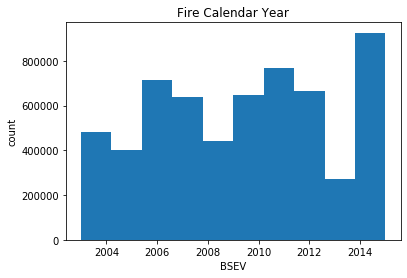

In [29]:
# Visualize the BSEV distribution by year
fig, ax = plt.subplots()
ax.hist(emdata['year'], bins=10, range = (emdata['year'].min(),emdata['year'].max()))
plt.title('Fire Calendar Year')
plt.xlabel('BSEV')
plt.ylabel('count')
plt.show()

### Visualize the four (4) dependent variables 

Use seaborn to plot a histogram. We have 4 separate categories.
1 (not burned), 2 (light), 3(med), 4 (heavy burn)

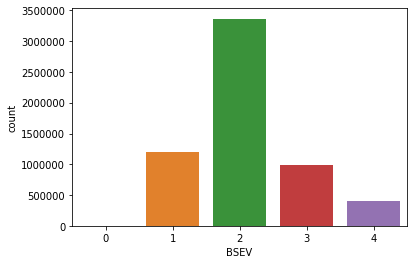

In [30]:
# We have 4 separate categories: 1 (not burned), 2 (light), 3(med), 4 (heavy burn)
sns.countplot(emdata['BSEV'],label="Count")
plt.show()

### Calendar Year 2015 has the highest incidence of Wildfires from histogram ( see above)

In [31]:
# Focus on CY2015 which is the year in our data set that has the highest number of wildfires
emdata2015 = emdata[(emdata.year == 2015)]
print('There are {:,} rows'.format(len(emdata2015)))

There are 483,703 rows


In [32]:
# For CY2015 look at Coarse Woody Debris and Duff Decomposing Plant Material
emdata2015[['cwd_frac', 'duff_frac']].agg(['mean','min','max'])

,cwd_frac,duff_frac
mean,0.098463,0.105320
min,0.000000,0.000000
max,0.497034,0.787142


In [33]:
# Check the fuel a wildfire consumes for CY2015
emdata2015[['prefire_fuel', 'consumed_fuel']].agg(['mean','min','max'])

,prefire_fuel,consumed_fuel
mean,3534.090742,2301.721913
min,3.810924,3.544159
max,13337.510830,9591.987935


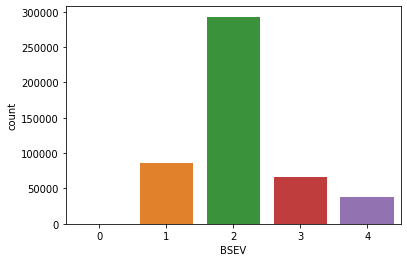

In [34]:
# Burn measurement categories for CY2015
sns.countplot(emdata2015['BSEV'],label="Count")
plt.show()

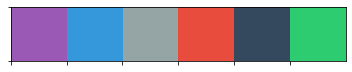

<Figure size 1440x432 with 0 Axes>

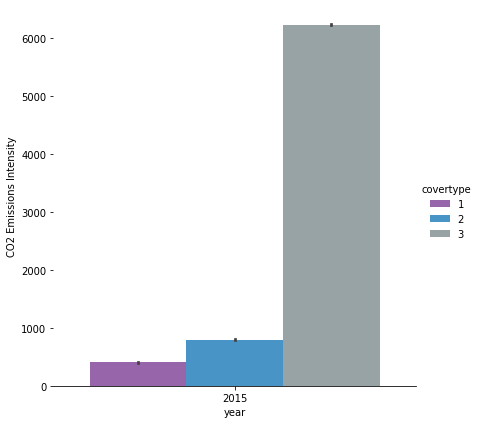

In [35]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

plt.figure(figsize=(20, 6))

covertypeplot = sns.catplot(x="year", y="ECO2", hue='covertype', data=emdata2015,
                height=6, kind="bar", palette=flatui)
covertypeplot.despine(left=True)
covertypeplot.set_ylabels("CO2 Emissions Intensity")

### Histogram illustrates that largest number of wildfires consumed least amount PreFire Fuel Mass in hectares

Text(0, 0.5, 'Distributinon of PreFire Fuel Measurements')

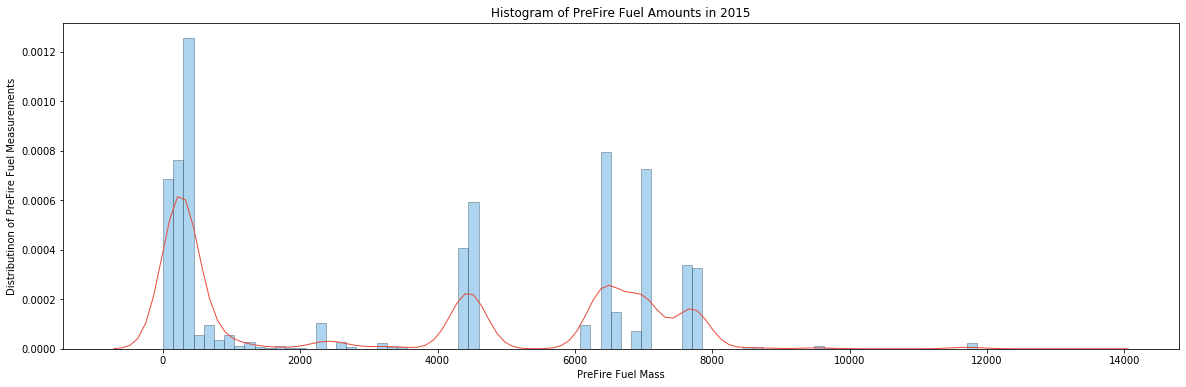

In [36]:
plt.figure(figsize=(20, 6))
sns.distplot(emdata2015['prefire_fuel'], hist = True, kde = True, bins=int(180/2), color = '#3498db', 
             kde_kws = {'shade': False, 'linewidth': 1, 'color': '#e74c3c'}, 
             hist_kws={'edgecolor':'#34495e'})
             #label = 'Prefuel Fire Mass')

plt.title('Histogram of PreFire Fuel Amounts in 2015')
plt.xlabel('PreFire Fuel Mass')
plt.ylabel('Distributinon of PreFire Fuel Measurements')

### USDA Fire Emissions database covers all of CONUS

<function matplotlib.pyplot.show(*args, **kw)>

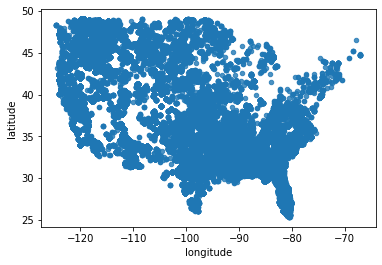

In [37]:
# Show geographically the extent of wildfires in CY2015
emdata2015.plot(kind="scatter", x="longitude", y="latitude",alpha=0.8)

plt.show

### Lets limit the USDA dataset to just the state of California

In [38]:
# Creating a variable to toggle/limit the dataset to one year within the boundaries of California 
emdata2015_ca = emdata2015[(emdata2015.latitude > 34) & (emdata2015.longitude < -114)]
emdata2015_ca[1:2]

,id,year,doy,longitude,latitude,covertype,fuelcode,area_burned,prefire_fuel,consumed_fuel,ECO2,ECO,ECH4,EPM2.5,cwd_frac,duff_frac,fuel_moisture_class,burn_source,BSEV
5600950,277995,2015,201,-124.5848,48.342,3,1300,0.0,11715.036749,6469.142768,10053.047862,860.395988,48.389188,147.496455,0.464559,0.275379,2,3,1


### Visualizing the Wildfire data points in California

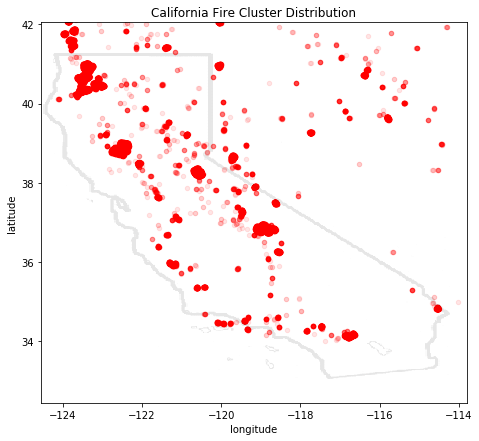

In [39]:
# California Fire Distribution Map
import matplotlib.image as mpimg
california_img=mpimg.imread('CaliforniaMapOutline.gif')
emdata2015_ca.plot(kind="scatter", x="longitude", y="latitude", c= "red", figsize=(10,7), alpha=0.1)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.1)
plt.title('California Fire Cluster Distribution') 
plt.show()

In [40]:
# Removing select columns to shorten the box plot distribution
emdata2015_ca2 = emdata2015_ca.drop(['id', 'covertype', 'cwd_frac', 'duff_frac'], 1)

### Draw box diagram to see scale and quartiles of data

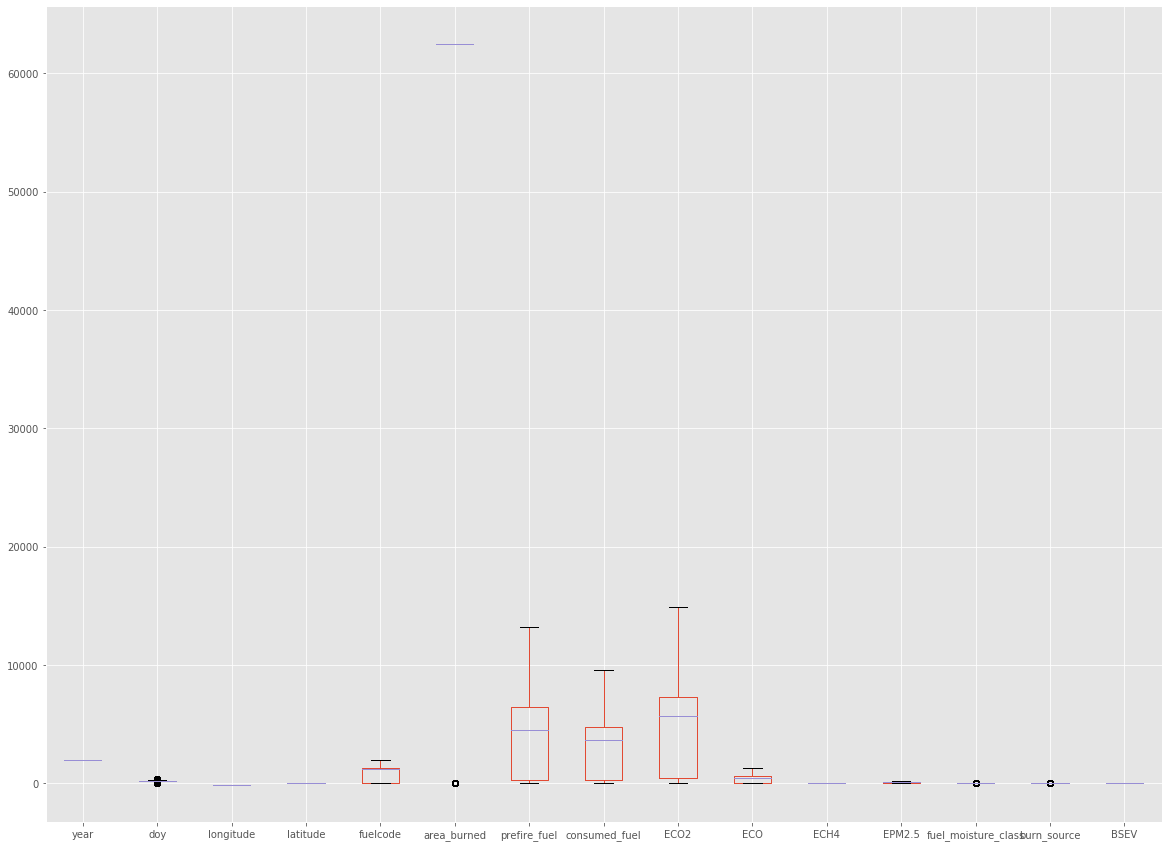

In [41]:
#draw box plot of see range of the data
matplotlib.style.use('ggplot')
emdata2015_ca2.plot(kind='box',figsize=(20,15))